# Limpeza e transformação de Dados
Neste notebook vamos explorar técnicas de limpeza e transformação de dados

In [ ]:
import pandas as pd
import numpy as np

#carregando os dados
df = pd.read_csv('vendas.csv')

In [ ]:
# vamos exibir as informações gerais sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cliente_ID        205 non-null    float64
 1   Data              204 non-null    object 
 2   Vendas            204 non-null    object 
 3   CategoriaProduto  210 non-null    object 
 4   Retornos          197 non-null    object 
dtypes: float64(1), object(4)
memory usage: 8.3+ KB


In [ ]:
df

,Cliente_ID,Data,Vendas,CategoriaProduto,Retornos
0,1102.0,2023-01-01 00:00:00.000000,421.90585974848375,Roupas,False
1,1435.0,2023-01-02 19:53:58.190954,194.0223204637753,Brinquedos,False
2,1860.0,2023-01-04 15:47:56.381909,452.9854528232902,Eletrônicos,True
3,1270.0,2023-01-06 11:41:54.572864,225.1407554303734,Brinquedos,False
4,1106.0,2023-01-08 07:35:52.763819,54.87694316613426,Roupas,False
...,...,...,...,...,...
205,1724.0,2023-07-30 08:26:31.959798,494.274258191725,Móveis,NaN
206,1241.0,2023-05-07 05:03:55.175879,69.42196037775925,Roupas,False
207,1986.0,2023-11-07 22:54:52.462311,329.93901510254307,Brinquedos,False
208,1612.0,NaN,466.96443132267245,Móveis,False


In [ ]:
df.head()

,Cliente_ID,Data,Vendas,CategoriaProduto,Retornos
0,1102.0,2023-01-01 00:00:00.000000,421.90585974848375,Roupas,False
1,1435.0,2023-01-02 19:53:58.190954,194.0223204637753,Brinquedos,False
2,1860.0,2023-01-04 15:47:56.381909,452.9854528232902,Eletrônicos,True
3,1270.0,2023-01-06 11:41:54.572864,225.1407554303734,Brinquedos,False
4,1106.0,2023-01-08 07:35:52.763819,54.87694316613426,Roupas,False


In [ ]:
df.tail()

,Cliente_ID,Data,Vendas,CategoriaProduto,Retornos
205,1724.0,2023-07-30 08:26:31.959798,494.274258191725,Móveis,NaN
206,1241.0,2023-05-07 05:03:55.175879,69.42196037775925,Roupas,False
207,1986.0,2023-11-07 22:54:52.462311,329.93901510254307,Brinquedos,False
208,1612.0,NaN,466.96443132267245,Móveis,False
209,1975.0,2023-03-24 07:28:38.592964,219.3168134889121,Móveis,True


In [ ]:
#formato dos dados
df.shape

(210, 5)

In [ ]:
# familiarizar com os dados faltantes
df.describe(include='all')

,Cliente_ID,Data,Vendas,CategoriaProduto,Retornos
count,205.000000,204,204,210,197
unique,NaN,195,191,6,2
top,NaN,2023-08-23 03:08:08.442211,erro,Roupas,False
freq,NaN,2,5,44,175
mean,1492.824390,NaN,NaN,NaN,NaN
std,292.371672,NaN,NaN,NaN,NaN
min,1001.000000,NaN,NaN,NaN,NaN
25%,1241.000000,NaN,NaN,NaN,NaN
50%,1489.000000,NaN,NaN,NaN,NaN
75%,1763.000000,NaN,NaN,NaN,NaN


In [ ]:
# exibindo a contagem de valores nulos em cada coluna
df.isnull().sum()

,0
Cliente_ID,5
Data,6
Vendas,6
CategoriaProduto,0
Retornos,13


# Detecção e remoção de valores duplicados
Duplicatas são registros repetidos que podem distorcer as análises futuras.

In [ ]:
# identificando duplicatas
linhas_duplicadas = df[df.duplicated()]
linhas_duplicadas

,Cliente_ID,Data,Vendas,CategoriaProduto,Retornos
200,1821.0,2023-06-23 18:27:08.140703,488.4776634497749,Móveis,NaN
201,1372.0,2023-01-28 10:29:32.864321,352.63330523466726,Eletrônicos,False
202,1276.0,2023-02-24 20:59:05.728643,95.50520425525562,Alimentos,True
203,1929.0,2023-10-17 00:07:14.170854,NaN,Brinquedos,False
204,1040.0,2023-08-23 03:08:08.442211,499.87295297875875,Alimentos,False
205,1724.0,2023-07-30 08:26:31.959798,494.274258191725,Móveis,NaN
206,1241.0,2023-05-07 05:03:55.175879,69.42196037775925,Roupas,False
207,1986.0,2023-11-07 22:54:52.462311,329.93901510254307,Brinquedos,False
208,1612.0,NaN,466.96443132267245,Móveis,False
209,1975.0,2023-03-24 07:28:38.592964,219.3168134889121,Móveis,True


In [ ]:
#removendo as duplicatas
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cliente_ID        195 non-null    float64
 1   Data              195 non-null    object 
 2   Vendas            195 non-null    object 
 3   CategoriaProduto  200 non-null    object 
 4   Retornos          189 non-null    object 
dtypes: float64(1), object(4)
memory usage: 9.4+ KB


# Tratamento de valores ausentes
Valores ausentes podem causar problemas em análises e modelos de ML.

In [ ]:
# verificando os valores ausentes
df.isnull().sum()

,0
Cliente_ID,5
Data,5
Vendas,5
CategoriaProduto,0
Retornos,11


## tratando valores ausentes coluna por coluna

In [ ]:
df['Cliente_ID'].fillna(df['Cliente_ID'].mean(), inplace=True)

<ipython-input-25-b10a41e0335d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cliente_ID'].fillna(df['Cliente_ID'].mean(), inplace=True)


In [ ]:
# verificando os valores ausentes
df.isnull().sum()

,0
Cliente_ID,0
Data,5
Vendas,5
CategoriaProduto,0
Retornos,11


In [ ]:
df['Vendas'] = pd.to_numeric(df['Vendas'], errors='coerce')


In [ ]:
# verificando os valores ausentes
df.isnull().sum()

,0
Cliente_ID,0
Data,5
Vendas,10
CategoriaProduto,0
Retornos,11


In [ ]:
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

<ipython-input-27-f7ee3b5ee5b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)


In [ ]:
df.isnull().sum()

,0
Cliente_ID,0
Data,5
Vendas,0
CategoriaProduto,0
Retornos,11


In [ ]:
df['Data'].fillna(pd.to_datetime('2023-07-07'), inplace=True)

<ipython-input-29-aac67869f438>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Data'].fillna(pd.to_datetime('2023-07-07'), inplace=True)


In [ ]:
df.isnull().sum()

,0
Cliente_ID,0
Data,0
Vendas,0
CategoriaProduto,0
Retornos,11


In [ ]:
df['Retornos'].fillna(False, inplace=True)

<ipython-input-31-145b21dc4594>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Retornos'].fillna(False, inplace=True)
<ipython-input-31-145b21dc4594>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Retornos'].fillna(False, inplace=True)


In [ ]:
df.isnull().sum()

,0
Cliente_ID,0
Data,0
Vendas,0
CategoriaProduto,0
Retornos,0


In [ ]:
# Correção de categorias com erro de digitação
df['CategoriaProduto'] = df['CategoriaProduto'].replace('eletronicos', 'Eletrônicos')
df['CategoriaProduto'].value_counts()

,count
CategoriaProduto,
Eletrônicos,49
Roupas,43
Alimentos,40
Móveis,38
Brinquedos,30


# Correção de erros de formatos de dados
Erros de formato de dados podem ocorrer quando valores inesperados são inseridos em colunas numéricas ou de datas.

In [ ]:
#verificando os tipos de dados
df.dtypes

,0
Cliente_ID,float64
Data,object
Vendas,float64
CategoriaProduto,object
Retornos,bool


In [ ]:
df['Cliente_ID'] = df['Cliente_ID'].astype(int)

In [ ]:
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
df.dtypes

,0
Cliente_ID,int64
Data,datetime64[ns]
Vendas,float64
CategoriaProduto,object
Retornos,bool


In [ ]:
df

,Cliente_ID,Data,Vendas,CategoriaProduto,Retornos
0,1102,2023-01-01 00:00:00.000000,421.905860,Roupas,False
1,1435,2023-01-02 19:53:58.190954,194.022320,Brinquedos,False
2,1860,2023-01-04 15:47:56.381909,452.985453,Eletrônicos,True
3,1270,2023-01-06 11:41:54.572864,225.140755,Brinquedos,False
4,1106,2023-01-08 07:35:52.763819,54.876943,Roupas,False
...,...,...,...,...,...
195,1863,2023-12-23 16:24:07.236180,136.530058,Roupas,False
196,1742,2023-12-25 12:18:05.427135,68.390877,Brinquedos,True
197,1240,2023-12-27 08:12:03.618090,126.020778,Alimentos,False
198,1563,2023-12-29 04:06:01.809045,175.365653,Roupas,True


In [ ]:
# salvando o nome dataset já tratado
df.to_csv('vendas_tratado.csv')

# Análise e visualização dos dados

In [ ]:
df = pd.read_csv('vendas_tratado.csv')

In [ ]:
# Estatísticas descritivas
df.describe()

,Unnamed: 0,Cliente_ID,Vendas
count,200.000000,200.000000,200.000000
mean,99.500000,1487.440000,286.476407
std,57.879185,285.857164,134.894818
min,0.000000,1001.000000,54.876943
25%,49.750000,1242.500000,178.036188
50%,99.500000,1487.000000,286.476407
75%,149.250000,1743.250000,405.548766
max,199.000000,1995.000000,499.872953


In [ ]:
# Remove a coluna "Unnamed: 0"
df = df.drop(columns=["Unnamed: 0"])

In [ ]:
df

,Cliente_ID,Data,Vendas,CategoriaProduto,Retornos
0,1102,2023-01-01 00:00:00.000000,421.905860,Roupas,False
1,1435,2023-01-02 19:53:58.190954,194.022320,Brinquedos,False
2,1860,2023-01-04 15:47:56.381909,452.985453,Eletrônicos,True
3,1270,2023-01-06 11:41:54.572864,225.140755,Brinquedos,False
4,1106,2023-01-08 07:35:52.763819,54.876943,Roupas,False
...,...,...,...,...,...
195,1863,2023-12-23 16:24:07.236180,136.530058,Roupas,False
196,1742,2023-12-25 12:18:05.427135,68.390877,Brinquedos,True
197,1240,2023-12-27 08:12:03.618090,126.020778,Alimentos,False
198,1563,2023-12-29 04:06:01.809045,175.365653,Roupas,True


In [ ]:
# média e mediana do valor das vendas
vendas_medias = df['Vendas'].mean()
mediana_vendas = df['Vendas'].median()

print(f'Média: {vendas_medias: .3f}, Mediana: {mediana_vendas:.3f}')

Média:  286.476, Mediana: 286.476


# Visualização dos dados
Vamos criar algumas visualizações
## Histograma do valor de vendas

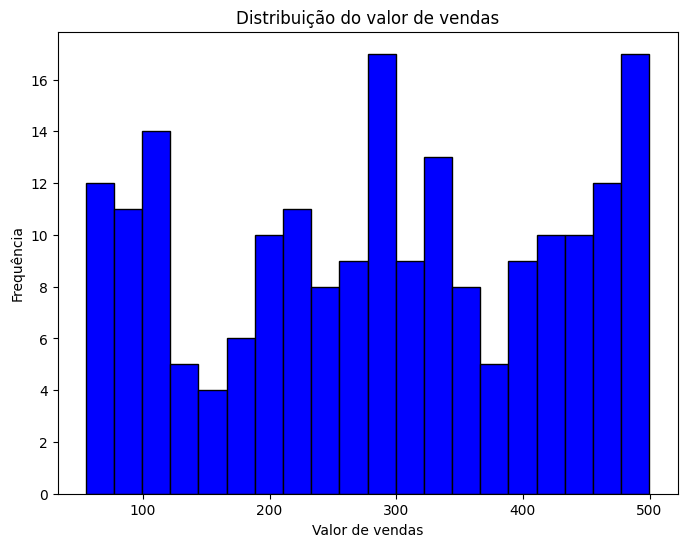

In [ ]:
import matplotlib.pyplot as plt

#historama
plt.figure(figsize=(8,6))
plt.hist(df['Vendas'], bins=20, color='blue', edgecolor='black')
plt.title('Distribuição do valor de vendas')
plt.xlabel('Valor de vendas')
plt.ylabel('Frequência')
plt.show()

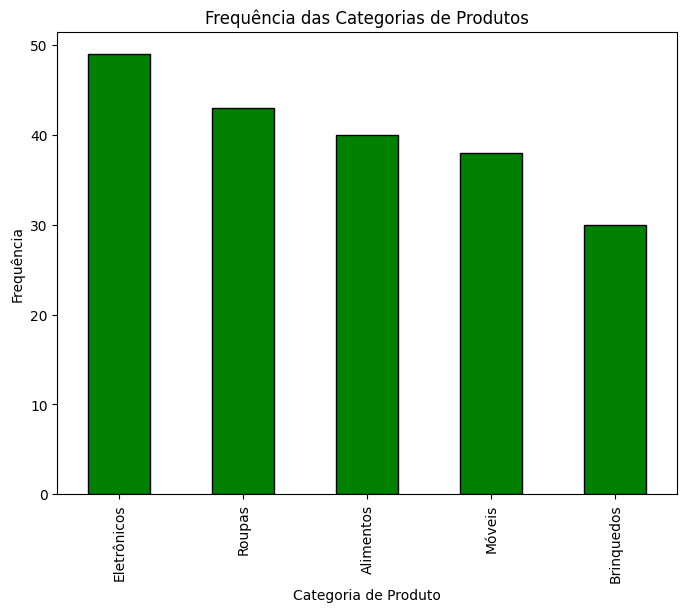

In [ ]:
# Gráfico de barras das categorias de produtos
plt.figure(figsize=(8, 6))
df['CategoriaProduto'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title('Frequência das Categorias de Produtos')
plt.xlabel('Categoria de Produto')
plt.ylabel('Frequência')
plt.show()

<Figure size 800x600 with 0 Axes>

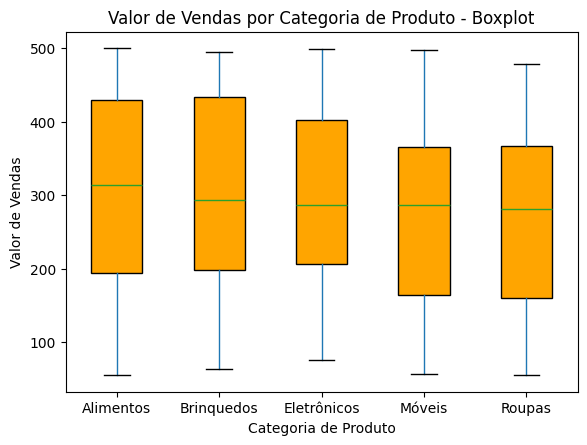

In [ ]:
# Boxplot do valor de vendas por categoria de produto
plt.figure(figsize=(8, 6))
df.boxplot(column='Vendas', by='CategoriaProduto', grid=False, patch_artist=True,
           boxprops=dict(facecolor='orange'))
plt.title('Valor de Vendas por Categoria de Produto - Boxplot')
plt.suptitle('')
plt.xlabel('Categoria de Produto')
plt.ylabel('Valor de Vendas')
plt.show()